# 模組 5.1: 特徵縮放方法比較 (Scaling Methods)

## 學習目標
- 理解為何需要對數值特徵進行縮放。
- 學習並實作最常用的兩種縮放方法：標準化 (Standardization) 和歸一化 (Normalization)。
- 透過視覺化比較不同縮放方法對資料分佈的影響。
- 掌握在 Scikit-learn 中進行特徵縮放的正確流程 (fit on train, transform train/test)。

## 導論：為何需要統一「度量衡」？

「*將不同特徵的數值範圍調整到可比較的尺度...防止數值範圍大的特徵主導模型訓練過程*」。這就是特徵縮放的「第一原理」。

想像一個資料集有「年齡」（範圍 0-100）和「年收入」（範圍 0-1,000,000）兩個特徵。如果直接將它們輸入到一個基於距離的模型（如 KNN）或使用梯度下降優化的模型（如線性迴歸、神經網路），模型會不成比例地被「年收入」這個特徵所主導，因為它的數值範圍遠大於「年齡」。

特徵縮放的目的就是將所有特徵的數值放在一個公平的、可比較的尺度上，確保每個特徵都能對模型的結果做出其應有的貢獻。

In [7]:
# 導入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
# 設定視覺化風格
# 'seaborn-v0_8-whitegrid' 提供了帶有白色網格的 seaborn 預設風格，更易於讀取
plt.style.use('seaborn-v0_8-whitegrid')
# 設置中文字體，以防圖表標題或標籤出現亂碼
# 請確保您的環境中已安裝 'Microsoft JhengHei' 或其他中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
print("Matplotlib and Seaborn styles configured.")

# 忽略不必要的警告訊息
import warnings
warnings.filterwarnings('ignore')



Matplotlib and Seaborn styles configured.


## 1. 準備資料

我們將使用 `insurance` 資料集，其中包含了 `age`, `bmi`, `children`, `charges` 等不同範圍的數值特徵。

In [8]:
# 載入資料
path = r'..\..\..\..\datasets\raw\insurance\insurance.csv'
try:
    df = pd.read_csv(path)
    # 為簡化，我們先只處理數值特徵
    df_numeric = df.select_dtypes(include=np.number)
    print("成功載入 Insurance 資料集並選取數值特徵!")
    display(df_numeric.head())
    print("\n原始資料描述:")
    display(df_numeric.describe())
except FileNotFoundError:
    print(f"在 '{path}' 找不到 insurance.csv。")
    df_numeric = pd.DataFrame()



成功載入 Insurance 資料集並選取數值特徵!


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520



原始資料描述:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2. 標準化 (Standardization)

- **原理**: 將數據轉換為 **均值為 0，標準差為 1** 的分佈。它保留了原始數據的分佈形狀和異常值的資訊。
- **公式**: `z = (x - μ) / σ`
- **適用**: 大多數情況下的首選。對異常值相對不那麼敏感。

In [9]:
# --- 使用 StandardScaler ---
scaler_std = StandardScaler()
df_standardized = pd.DataFrame(scaler_std.fit_transform(df_numeric), columns=df_numeric.columns)



## 3. 歸一化 (Normalization)

- **原理**: 將數據重新縮放到一個固定的區間，通常是 **[0, 1]**。
- **公式**: `X_norm = (X - X_min) / (X_max - X_min)`
- **適用**: 當你需要將數據限制在特定範圍內時（如圖像處理的像素值）。**對異常值非常敏感**，因為最大/最小值會決定整個縮放的範圍。

In [10]:
# --- 使用 MinMaxScaler ---
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)



## 4. 視覺化比較

讓我們來看看縮放前後以及不同縮放方法之間的差異。

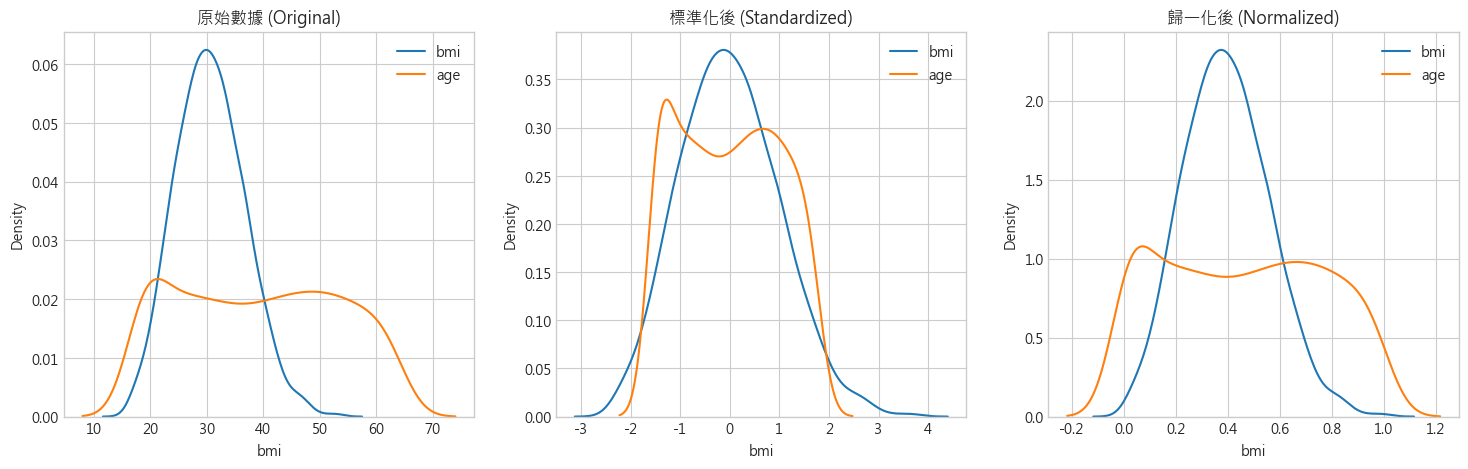

--- 標準化後描述 ---


,age,bmi,children,charges
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,-8.098488e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,-1.003557e+00
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,-7.046504e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,-3.212089e-01
75%,8.396738e-01,6.611572e-01,7.510793e-01,2.783441e-01
max,1.765289e+00,3.685522e+00,3.240619e+00,4.171663e+00



--- 歸一化後描述 ---


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.193916
std,0.305434,0.164062,0.241099,0.193301
min,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.057757
50%,0.456522,0.388485,0.200000,0.131849
75%,0.717391,0.504002,0.400000,0.247700
max,1.000000,1.000000,1.000000,1.000000


In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

# 原始數據
ax1.set_title('原始數據 (Original)')
sns.kdeplot(df_numeric['bmi'], ax=ax1, label='bmi')
sns.kdeplot(df_numeric['age'], ax=ax1, label='age')
ax1.legend()

# 標準化後
ax2.set_title('標準化後 (Standardized)')
sns.kdeplot(df_standardized['bmi'], ax=ax2, label='bmi')
sns.kdeplot(df_standardized['age'], ax=ax2, label='age')
ax2.legend()

# 歸一化後
ax3.set_title('歸一化後 (Normalized)')
sns.kdeplot(df_normalized['bmi'], ax=ax3, label='bmi')
sns.kdeplot(df_normalized['age'], ax=ax3, label='age')
ax3.legend()

plt.show()

print("--- 標準化後描述 ---")
display(df_standardized.describe())
print("\n--- 歸一化後描述 ---")
display(df_normalized.describe())



**觀察**:
- **分佈形狀不變**: 注意，無論是標準化還是歸一化，都**沒有改變原始數據的分佈形狀**。它們只改變了數據的**尺度 (scale)**。
- **標準化**: 處理後的數據均值接近 0，標準差接近 1。
- **歸一化**: 處理後的數據最小值為 0，最大值為 1。

## 5. 在訓練/測試集上應用的正確流程

這是特徵縮放中最關鍵、最容易出錯的地方，直接關係到 **數據洩漏**。

**第一原理**: 測試集是用來模擬模型在未來從未見過的真實數據上的表現。因此，任何關於數據分佈的資訊（如均值、標準差、最大/最小值）都**只能從訓練集中學習**。

**正確流程**:
1. 將數據集劃分為訓練集和測試集。
2. 在 **訓練集** 上呼叫縮放器 (Scaler) 的 `.fit()` 方法來學習縮放參數。
3. 使用學習到的縮放器，分別對 **訓練集** 和 **測試集** 呼叫 `.transform()` 方法來應用縮放。

In [12]:
# 1. 劃分資料
X = df_numeric.copy()
y = df['charges'] # 假設 charges 是目標
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 創建並在訓練集上 fit 縮放器
scaler = StandardScaler()
scaler.fit(X_train) # 只在 X_train 上學習均值和標準差

# 3. 對訓練集和測試集進行 transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 轉換回 DataFrame 以便查看
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("--- 訓練集縮放後描述 ---")
display(X_train_scaled_df.describe())

print("\n--- 測試集縮放後描述 ---")
display(X_test_scaled_df.describe())



--- 訓練集縮放後描述 ---


,age,bmi,children,charges
count,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03
mean,-1.992176e-16,-4.648410e-17,-2.324205e-17,7.304645e-17
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.518194e+00,-2.417060e+00,-9.111921e-01,-1.017507e+00
25%,-8.784157e-01,-7.210253e-01,-9.111921e-01,-7.032210e-01
50%,1.016470e-02,-5.800739e-02,-8.842793e-02,-3.138573e-01
75%,8.276587e-01,6.515707e-01,7.343363e-01,2.830529e-01
max,1.751782e+00,3.736342e+00,3.202629e+00,4.099153e+00



--- 測試集縮放後描述 ---


,age,bmi,children,charges
count,268.000000,268.000000,268.000000,268.000000
mean,-0.053230,0.085129,-0.051588,-0.031445
std,0.992638,1.044117,0.957308,1.039063
min,-1.518194,-2.275517,-0.911192,-1.016705
25%,-0.949502,-0.643839,-0.911192,-0.753906
50%,-0.096465,0.036355,-0.088428,-0.404383
75%,0.756572,0.768075,0.734336,0.251520
max,1.751782,3.645291,3.202629,4.197169


**觀察**:
- 訓練集縮放後的均值接近 0，標準差接近 1。
- **測試集** 縮放後的均值和標準差 **不會** 嚴格等於 0 和 1，這是**完全正常的**，因為我們是用訓練集的參數來轉換它的。這才是正確模擬真實世界情況的方法。

## 總結

| 方法 | 原理 | 優點 | 缺點/風險 | 適用場景 |
| :--- | :--- | :--- | :--- | :--- |
| **標準化 (Standardization)** | 均值=0, 標準差=1 | 保留異常值資訊，適用範圍廣。 | 數據沒有被限制在特定範圍內。 | **大多數機器學習演算法的預設首選。** |
| **歸一化 (Normalization)** | 縮放到 [0, 1] | 數據範圍固定，直觀。 | **對異常值非常敏感**。 | 需要特定數據範圍的演算法（如某些神經網路、圖像處理）。 |

永遠記住 **`fit on train, transform on train and test`** 的黃金法則，以避免數據洩漏。